### Importing the necessary libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

### Loading the dataset and checking the entries

In [14]:
emotion_train = pd.read_csv('training.csv')

In [15]:
emotion_train['label_name'] = emotion_train['label'].map({0:'sad', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'})
emotion_train.head(10)

,text,label,label_name
0,i didnt feel humiliated,0,sad
1,i can go from feeling so hopeless to so damned...,0,sad
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
5,ive been feeling a little burdened lately wasn...,0,sad
6,ive been taking or milligrams or times recomme...,5,surprise
7,i feel as confused about life as a teenager or...,4,fear
8,i have been with petronas for years i feel tha...,1,joy
9,i feel romantic too,2,love


In [16]:
counts = emotion_train['label_name'].value_counts()
counts

joy         5362
sad         4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label_name, dtype: int64

## Visualizations

Mapping the labels with their lable_names for easy visualization

Text(0.5, 1.0, 'Classes and their counts')

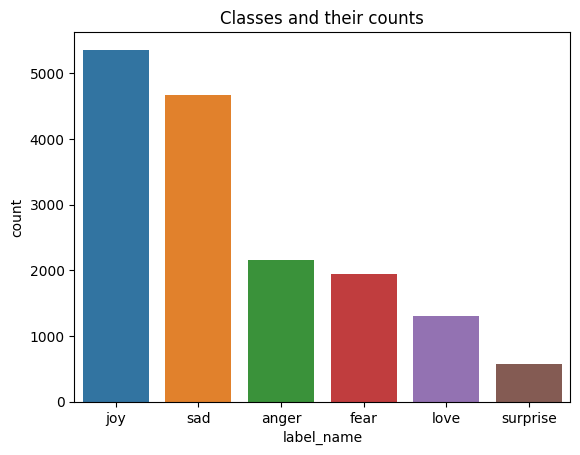

In [24]:
order = ['joy', 'sad', 'anger', 'fear', 'love', 'surprise']
sns.countplot(emotion_train, x='label_name',order=order)
plt.title('Classes and their counts')

Find the text length of each entry

In [18]:
emotion_train['text_length'] = emotion_train['text'].astype(str).apply(len)
emotion_train

,text,label,label_name,text_length
0,i didnt feel humiliated,0,sad,23
1,i can go from feeling so hopeless to so damned...,0,sad,108
2,im grabbing a minute to post i feel greedy wrong,3,anger,48
3,i am ever feeling nostalgic about the fireplac...,2,love,92
4,i am feeling grouchy,3,anger,20
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sad,101
15996,i am now turning and i feel pathetic that i am...,0,sad,102
15997,i feel strong and good overall,1,joy,30
15998,i feel like this was such a rude comment and i...,3,anger,59


In [19]:
pd.DataFrame(emotion_train['text_length'].describe())

,text_length
count,16000.000000
mean,96.845812
std,55.904953
min,7.000000
25%,53.000000
50%,86.000000
75%,129.000000
max,300.000000


Plotting the text length to understand the spread of text length.

Text(0.5, 1.0, 'Text Length Histogram')

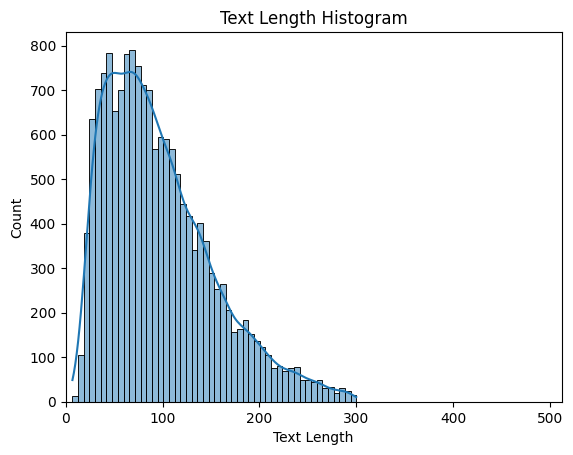

In [26]:
emotion_train['text_length'] = emotion_train['text'].apply(len)
sns.histplot(emotion_train['text_length'], bins=50, kde=True)
plt.xlim([0, 512]);
plt.xlabel('Text Length');
plt.title('Text Length Histogram')

In [21]:
print("Skewness: {:.3f}".format(emotion_train['text_length'].skew()))

Skewness: 0.966


Word count for each of the texts and analyzing the word counts as per the label names

In [22]:
emotion_train['word_count'] = emotion_train['text'].apply(lambda x : len(str(x).split()))

Text(0.5, 1.0, 'Word Count vs Classes')

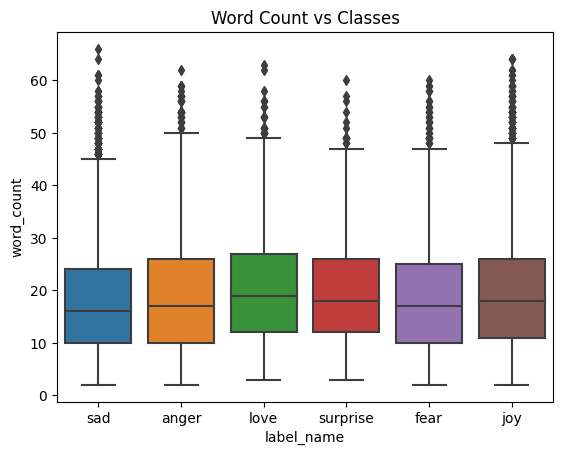

In [27]:
sns.boxplot(x="label_name", y="word_count", data=emotion_train)
plt.title('Word Count vs Classes')

### Checking for any missing values

In [34]:
emotion_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         16000 non-null  object
 1   label        16000 non-null  int64 
 2   label_name   16000 non-null  object
 3   text_length  16000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 500.1+ KB


In [35]:
emotion_train.isnull().sum()

text           0
label          0
label_name     0
text_length    0
dtype: int64

### NLP cleaning

In [32]:
texts = []
stemming = PorterStemmer()
lem = WordNetLemmatizer()
lines = emotion_train['text'].tolist()
# print(lines[:5])
i = 0
for line in lines:
    sentence = re.sub('[^a-zA-Z]', ' ', line)
    lower_case = sentence.lower()
    listofwords = lower_case.split()
    after_stemming = [lem.lemat(word) for word in listofwords if word not in stopwords.words('english')]
    #print(after_stemming)
    review = ' '.join(after_stemming)
    texts.append(review)
    
print('After stemming and removing the stopwords : \n')
texts[:5]

After stemming and removing the stopwords : 



['didnt feel humili',
 'go feel hopeless damn hope around someon care awak',
 'im grab minut post feel greedi wrong',
 'ever feel nostalg fireplac know still properti',
 'feel grouchi']

### Converting Textual data into vectors

In [45]:
cv = CountVectorizer(max_features = 1000)
X_train = cv.fit_transform(texts).toarray()
y_train = emotion_train['label']

In [92]:
tv = TfidfVectorizer(max_features= 1000)
X_train_tf = tv.fit_transform(texts)

All the feature names in the corpus

In [93]:
cv.get_feature_names_out()

array(['abil', 'abl', 'absolut', 'abus', 'accept', 'accomplish', 'ach',
       'achiev', 'across', 'act', 'action', 'activ', 'actual', 'ad',
       'add', 'admir', 'admit', 'adventur', 'afraid', 'age', 'agit',
       'ago', 'ahead', 'air', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'although', 'alway', 'amaz', 'amount', 'amp',
       'amus', 'anger', 'angri', 'annoy', 'anoth', 'answer', 'anxieti',
       'anxiou', 'anymor', 'anyon', 'anyth', 'anyway', 'apart', 'appreci',
       'apprehens', 'area', 'arm', 'around', 'art', 'artist', 'asham',
       'ask', 'assault', 'assur', 'attempt', 'attent', 'author', 'avoid',
       'aw', 'awar', 'away', 'awkward', 'babi', 'back', 'bad', 'base',
       'beat', 'beaten', 'beauti', 'becom', 'bed', 'began', 'begin',
       'behind', 'believ', 'belong', 'belov', 'best', 'better', 'beyond',
       'big', 'bit', 'bitch', 'bitchi', 'bitter', 'black', 'blame',
       'blank', 'bless', 'blog', 'bodi', 'book', 'bore', 'bother', 'boy',
    

In [78]:
cv_df = pd.DataFrame(data = X_train, columns=cv.get_feature_names_out())
display(cv_df)

,abil,abl,absolut,abus,accept,accomplish,ach,achiev,across,act,...,written,wrong,wrote,www,ye,year,yesterday,yet,young,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
tv_df = pd.DataFrame(data = X_train_tf.toarray(), columns=tv.get_feature_names_out())
display(tv_df)

,abil,abl,absolut,abus,accept,accomplish,ach,achiev,across,act,...,written,wrong,wrote,www,ye,year,yesterday,yet,young,your
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.464063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
